# Assignment - Naive Bayes Classifier
### Year 2018-2019  - Semester II
### CCE3502
####  developed by - Adrian Muscat, 2019
---
#Matthew Vella, 0428698M, BSc CS, Yr II
---







## In this assignment you will implement Naive Bayes Classifier model that labels fish as either one species or the other.

In [6]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import csv
# this line plots graphs in line
%matplotlib inline

## A system measures the width and length in centimetres of two fish species, spnott and awrat.  The results are given in a csv (comma separated) text file.


## We first load the dataset and print the first 10 entries.  The length is given in the 1st column, the width is given in the second column and the species is given in the third column.



In [7]:
# DO NOT MODIFY THIS CELL
with open('Fish_Dataset_2019.csv', 'r') as f:
#with open('Fish_Dataset_2019.csv', 'rbU') as f:
    reader = csv.reader(f)
    data_=[]
    for i,row in enumerate(reader):
        if i==0: 
            print (row)
        else:
            data_.append(row)
data = np.array(data_,dtype=float)
data[0:10]

['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']


array([[30.49,  9.4 ,  0.  ],
       [17.87,  5.62,  1.  ],
       [22.52,  5.56,  0.  ],
       [27.95, 10.55,  1.  ],
       [36.75, 10.49,  0.  ],
       [32.27, 13.06,  1.  ],
       [26.06,  8.16,  0.  ],
       [19.94,  6.4 ,  1.  ],
       [25.89,  8.5 ,  0.  ],
       [29.96, 11.56,  1.  ]])

## We shuffle the dataset

In [8]:
# DO NOT MODIFY THIS CELL
np.random.seed(2000)
np.random.shuffle(data)
print (data[0:10])

[[40.42 13.02  0.  ]
 [18.92  8.08  1.  ]
 [30.93  9.55  0.  ]
 [27.95 10.55  1.  ]
 [22.17 10.18  1.  ]
 [17.44  6.95  1.  ]
 [19.42  7.16  1.  ]
 [35.54 11.49  0.  ]
 [32.27 12.52  1.  ]
 [19.59  8.51  1.  ]]


## We explore the dataset, i.e size and number of examples per class

In [9]:
# DO NOT MODIFY THIS CELL
print ('size = ', np.shape(data))
print ('number of spnott = ',np.sum(data[:,2]==0))
print ('number of awrat = ',np.sum(data[:,2]==1))

size =  (240, 3)
number of spnott =  120
number of awrat =  120


## We  now split the dataset into two parts. One part is called the training (70%) set and the other part is called the test set (30%).

In [10]:
# DO NOT MODIFY THIS CELL
train_split = int(len(data)*0.7)
print ('Split dataset at index', train_split)
d_train=np.array(data[0:train_split,:])
d_test = np.array(data[train_split:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))
print ("Total number of examples = ",np.shape(d_train)[0] + np.shape(d_test)[0])

Split dataset at index 168
Shape of train =  (168, 3)
Shape of test =  (72, 3)
Total number of examples =  240


## We now plot the scatter plot to visualize the dataset in the 2D feature space

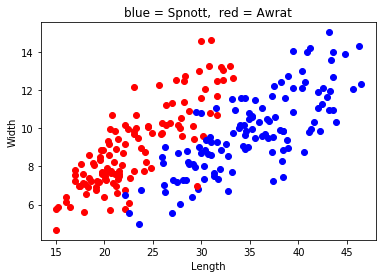

In [11]:
# DO NOT MODIFY THIS CELL
for item in data:
    if item[2]==0:
        plt.plot(item[0],item[1],'bo')
    if item[2]==1:
        plt.plot(item[0],item[1],'ro')
plt.title('blue = Spnott,  red = Awrat')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

## Graded Questions start here (Total marks = 60]

## Plot the class conditional probabilities, i.e P(Length|Spnott) and P(Width|Spnott). Repeat for the other output class. Use 10 bins for each plot. In total you should have four plots. [10 marks]

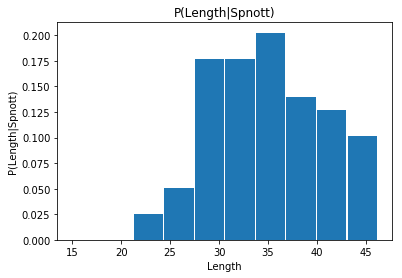

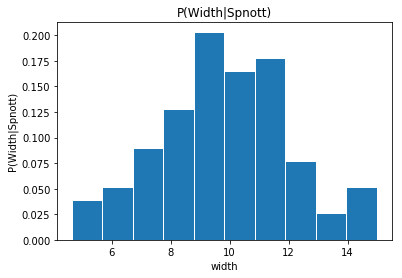

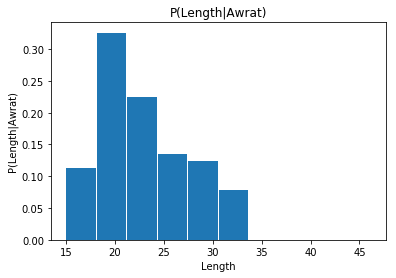

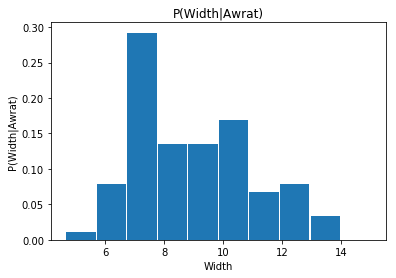

In [12]:
# Training set
# ['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']

#P(Length | Spnott)
length_spnott = []
width_spnott = []
length_awrat = []
width_awrat = []
for i in range(len(d_train)):
    if(d_train[i][2] == 0):
        # spnott
        length_spnott.append(d_train[i][0])
        width_spnott.append(d_train[i][1])

    else:
        # awrat

        length_awrat.append(d_train[i][0])
        width_awrat.append(d_train[i][1])

#convert the input to an array
length_spnott = np.asarray(length_spnott)
width_spnott = np.asarray(width_spnott)
length_awrat = np.asarray(length_awrat)
width_awrat = np.asarray(width_awrat)

#P(L/S)
length_bins=np.linspace(np.min(d_train[:,0]), np.max(d_train[:,0]), 11)
width_bins=np.linspace(np.min(d_train[:,1]), np.max(d_train[:,1]), 11)
length_spnott_hist = np.histogram(length_spnott, bins=length_bins)#, density=True)
plt.bar(length_spnott_hist[1][:-1], length_spnott_hist[0] / len(length_spnott), width = 3, align='edge')
plt.title('P(Length|Spnott)')
plt.xlabel('Length')
plt.ylabel('P(Length|Spnott)')
plt.show()

#P(W/S)
width_spnott_hist = np.histogram(width_spnott, bins=width_bins)
plt.bar(width_spnott_hist[1][:-1], width_spnott_hist[0] / len(width_spnott), width = 1, align='edge')
plt.title('P(Width|Spnott)')
plt.xlabel('width')
plt.ylabel('P(Width|Spnott)')
plt.show()

#P(L/A)
length_awrat_hist = np.histogram(length_awrat, bins=length_bins)
plt.bar(length_awrat_hist[1][:-1], length_awrat_hist[0] / len(length_awrat), width = 3, align='edge')
plt.title('P(Length|Awrat)')
plt.xlabel('Length')
plt.ylabel('P(Length|Awrat)')
plt.show()

#P(W/A)
width_awrat_hist = np.histogram(width_awrat, bins=width_bins)
plt.bar(width_awrat_hist[1][:-1], width_awrat_hist[0] / len(width_awrat), width = 1, align='edge')
plt.title('P(Width|Awrat)')
plt.xlabel('Width')
plt.ylabel('P(Width|Awrat)')
plt.show()

## Develop a function that returns the probability from the lookup table (histogram), given the x feature [10 marks]

In [18]:
# P(length/Spnott) 
def p_length_spnott(length):
    length = int(length)
    
    # Out of bounds
    if(length < length_spnott_hist[1][0] or length > length_spnott_hist[1][10]):
        return 0
    
    i = 10
    while(length < length_spnott_hist[1][i]):
        i -= 1
            
    return length_spnott_hist[0][i] / len(length_spnott)

# P(width, Spnott)
def p_width_spnott(width):
    width = int(width)  #typecasting to integer
    
    # Out of bounds
    if(width < width_spnott_hist[1][0] or width > width_spnott_hist[1][10]):
        return 0
    
    i = 10
    while(width < width_spnott_hist[1][i]):
        i -= 1
    
    return width_spnott_hist[0][i] / len(width_spnott)

# P(length | Awrat)
def p_length_awrat(length):
    length = int(length)
        
    # Out of bounds
    if(length < length_awrat_hist[1][0] or length > length_awrat_hist[1][10]):
        return 0
    
    i = 10
    while(length < length_awrat_hist[1][i]):
        i -= 1
    
    return length_awrat_hist[0][i] / len(length_awrat)

# P(width, Awrat)
def p_width_awrat(width):    
    width = int(width)
    
    # Out of bounds
    if(width < width_awrat_hist[1][0] or width > width_awrat_hist[1][10]):
        return 0
    
    i = 10
    while(width < width_awrat_hist[1][i]):
        i -= 1
    
    return width_awrat_hist[0][i] / len(width_awrat)

#Results
print ("Length spnott: {}".format(p_length_spnott(46.25)))
print ("Width spnott : {}".format(p_width_spnott(20)))
print ("Length Awrat : {}".format(p_length_awrat(20)))
print ("Width Awrat : {}".format(p_width_awrat(20)))

Length spnott: 0.10126582278481013
Width spnott : 0
Length Awrat : 0.3258426966292135
Width Awrat : 0


## Use the conditional probability tables generated above to formulate the Naive Bayes Model that predicts the output class given the input feature vector and compute the accuracy for both the train set and the test set. [10 marks]

In [24]:
# ['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']

# Likelihood(Spnott | length, width) = P(l | S)P(w | S)P(S)  
# Likelihood(Awrat  | length, width) = P(l | A)P(a | A)P(A)

# P(A)
def p_awrat():
    return np.count_nonzero(d_train[:, 2]) / len(d_train)

# P(S)
def p_spnott():
    return (len(d_train) - np.count_nonzero(d_train[:, 2])) / len(d_train)

# P(S | l, w)
def likelihood_spnott_l_w(length, width):
    return p_length_spnott(length) * p_width_spnott(width) * p_awrat()

# P(A | l, w)
def likelihood_awrat_l_w(length, width):
    return p_length_awrat(length) * p_width_awrat(width) * p_spnott()

def naive_bayes_model_histogram(length, width):
    if likelihood_spnott_l_w(length, width) > likelihood_awrat_l_w(length, width):
        return 0 # spnott
    else:
        return 1 # awrat


# Accuracy for train data
correct = 0 
incorrect = 0
for i in range(len(d_train)):
    #print (d_train[i])
    if(naive_bayes_model_histogram(d_train[i][0], d_train[i][1]) == d_train[i][2]):
        correct += 1
        #print("correct")
    else:
        #print("incorrect")
        incorrect += 1

        
print ("---Naive Bayes model: Histograms---")
print ("Train data: ")
print("Correct: {} --- Incorrect: {}".format(correct,incorrect))
accuracy = correct / (correct + incorrect)
hist_train = np.round(accuracy * 100, 3)
print ("Train data accuracy:", hist_train, "%")


# Accuracy for test data
correct = 0 
incorrect = 0
for i in range(len(d_test)):

    if(naive_bayes_model_histogram(d_test[i][0], d_test[i][1]) == d_test[i][2]):
        correct += 1
    else:
        incorrect += 1
        
print(" ") 
print ("Train data: ")
print("Correct: {} --- Incorrect: {}".format(correct,incorrect))
accuracy = correct / (correct + incorrect)
hist_test = np.round(accuracy * 100, 3)
print ("Train data accuracy:", hist_test, "%")

---Naive Bayes model with histograms---
Train data: 
Correct: 138 --- Incorrect: 30
Train data accuracy: 82.143 %
 
Train data: 
Correct: 54 --- Incorrect: 18
Train data accuracy: 75.0 %


## Model the conditionals using guassians and reformulate the Naive Bayes model using these gaussian models instead of the histogram based conditional probabilities. [20 marks]

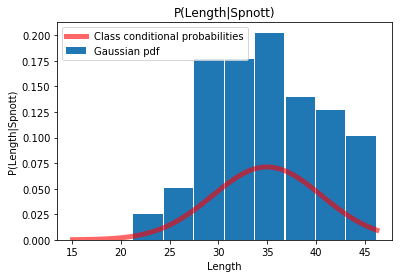

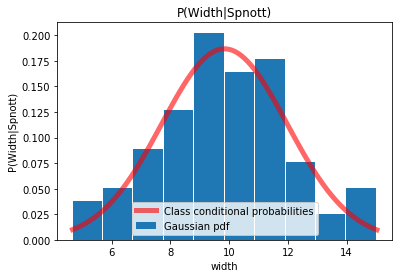

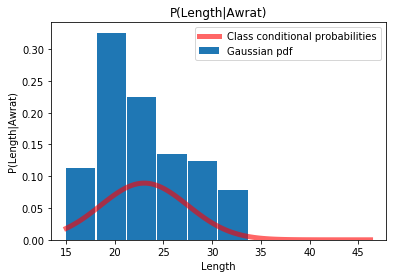

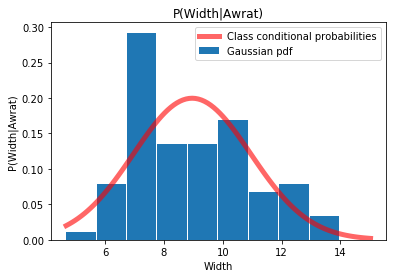

In [15]:
var_length_spnott = np.var(length_spnott)
mean_length_spnott = np.mean(length_spnott)

var_width_spnott = np.var(width_spnott)
mean_width_spnott = np.mean(width_spnott)

var_length_awrat = np.var(length_awrat)
mean_length_awrat = np.mean(length_awrat)

var_width_awrat = np.var(width_awrat)
mean_width_awrat = np.mean(width_awrat)

#Probability density function 
def p_length_spnott_gaussian(length):
    return norm.pdf(length, loc=mean_length_spnott, scale=np.sqrt(var_length_spnott))

def p_width_spnott_gaussian(width):
    return norm.pdf(width, loc=mean_width_spnott, scale=np.sqrt(var_width_spnott))

def p_length_awrat_gaussian(length):
    return norm.pdf(length, loc=mean_length_awrat, scale=np.sqrt(var_length_awrat))

def p_width_awrat_gaussian(width):  
    return norm.pdf(width, loc=mean_width_awrat, scale=np.sqrt(var_width_awrat))
    
    
length_guassian_bins = np.linspace(np.min(length_bins), np.max(length_bins), 100)
width_guassian_bins = np.linspace(np.min(width_bins), np.max(width_bins), 100)

plt.plot(length_guassian_bins, p_length_spnott_gaussian(length_guassian_bins), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.bar(length_spnott_hist[1][:-1], length_spnott_hist[0] / len(length_spnott), width = 3, align='edge')
plt.title('P(Length|Spnott)')
plt.xlabel('Length')
plt.ylabel('P(Length|Spnott)')
legend = ['Class conditional probabilities', 'Gaussian pdf']
plt.legend(legend)
plt.show()

plt.plot(width_guassian_bins, p_width_spnott_gaussian(width_guassian_bins), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.bar(width_spnott_hist[1][:-1], width_spnott_hist[0] / len(width_spnott), width = 1, align='edge')
plt.title('P(Width|Spnott)')
plt.xlabel('width')
plt.ylabel('P(Width|Spnott)')
plt.legend(legend)
plt.show()

plt.plot(length_guassian_bins, p_length_awrat_gaussian(length_guassian_bins), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.bar(length_awrat_hist[1][:-1], length_awrat_hist[0] / len(length_awrat), width = 3, align='edge')
plt.title('P(Length|Awrat)')
plt.xlabel('Length')
plt.ylabel('P(Length|Awrat)')
plt.legend(legend)
plt.show()

plt.plot(width_guassian_bins, p_width_awrat_gaussian(width_guassian_bins), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.bar(width_awrat_hist[1][:-1], width_awrat_hist[0] / len(width_awrat), width = 1, align='edge')
plt.title('P(Width|Awrat)')
plt.xlabel('Width')
plt.ylabel('P(Width|Awrat)')
plt.legend(legend)
plt.show()

#todo label plot, legend

In [26]:
# P(A)
def p_awrat():
    return np.count_nonzero(d_train[:, 2]) / len(d_train)

# P(S)
def p_spnott():
    return (len(d_train) - np.count_nonzero(d_train[:, 2])) / len(d_train)

# P(S | l, w)
def likelihood_spnott_l_w_gaussian(length, width):
    return p_length_spnott_gaussian(length) * p_width_spnott_gaussian(width) * p_awrat()

# P(A | l, w)
def likelihood_awrat_l_w_gaussian(length, width):
    return p_length_awrat_gaussian(length) * p_width_awrat_gaussian(width) * p_spnott()

def naive_bayes_model_gaussian(length, width):
    if likelihood_spnott_l_w_gaussian(length, width) > likelihood_awrat_l_w_gaussian(length, width):
        return 0 # spnott
    else:
        return 1 # awrat


# Train data accuracy
correct = 0 
incorrect = 0
for i in range(len(d_train)):
    #print (d_train[i])
    if(naive_bayes_model_gaussian(d_train[i][0], d_train[i][1]) == d_train[i][2]):
        correct += 1
        #print("correct")
    else:
        #print("incorrect")
        incorrect += 1

print ("---Naive Bayes model: Gaussians---")
print ("Train data: ")
print("Correct: {} --- Incorrect: {}".format(correct,incorrect))
accuracy = correct / (correct + incorrect)
guassian_train = np.round(accuracy * 100, 3)
print ("Train data accuracy:", guassian_train, "%")


# Accuracy for test data
correct = 0 
incorrect = 0
for i in range(len(d_test)):

    if(naive_bayes_model_gaussian(d_test[i][0], d_test[i][1]) == d_test[i][2]):
        correct += 1
    else:
        incorrect += 1
print(" ")
print ("Train data: ")
print("Correct: {} --- Incorrect: {}".format(correct,incorrect))
accuracy = correct / (correct + incorrect)
guassian_test = np.round(accuracy * 100, 3)
print ("Accuracy for Test data:", guassian_test, "%")

---Naive Bayes model: Gaussians---
Train data: 
Correct: 141 --- Incorrect: 27
Train data accuracy: 83.929 %
 
Train data: 
Correct: 55 --- Incorrect: 17
Accuracy for Test data: 76.389 %


## Which is the better model, the one based on histograms or the one based on gaussian models?
## Referring to the histogram model, explain how you would find the number of bins that maximizes accuracy. (You do not have to implement the experiment) [10 marks]

Histogram accuracy:  82.143 % ( 75.0 %)  
Guassian accuracy:  83.929 % ( 76.389 %) 


The Naive Bayes model using the gaussian models performed better for both the train and test data. Therefore, it may be assumed that this gives better results over the histograms. A big reason is becuase the Gaussian distribution gives a much smoother transition.

The gradient descend method may be used to maximize accuracy.